<p style="text-align:center" ><font size="10"><b>Varun Kamath</b></font></p>

<p style="text-align:center" ><b>Task 2: Cluster the Iris Dataset</b></p>

<p style="text-align:center" ><font size="5"><b>Importing Libraries</b></font></p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<p style="text-align:center" ><font size="5"><b>Importing Dataset</b></font></p>

In [70]:
dataset = pd.read_csv('Iris.csv')
X = dataset.iloc[:, 1:-1].values
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
print(X[0])

[5.1 3.5 1.4 0.2]


<p style="text-align:center" ><font size="5"><b>Finding number of clusters</b></font></p>

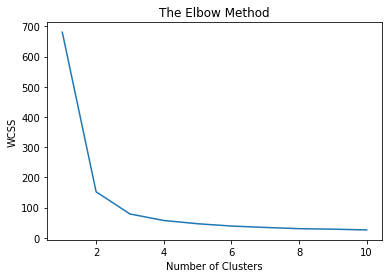

In [73]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',n_init = 10,random_state = 12)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# print(wcss)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

<p style="text-align:center" ><font size="5"><b>Number of Clusters is 3, fit predicting X</b></font></p>

In [74]:
kmeans = KMeans(n_clusters = 3, init='k-means++',n_init=10, random_state = 12)
y_kmeans = kmeans.fit_predict(X)

In [94]:
print(y_kmeans)
print(y_kmeans[100])
print(X[100])

# 0 = Iris-versicolor
# 1 = Iris-setosa
# 2 = Iris-virginica

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
2
[6.3 3.3 6.  2.5]


<p style="text-align:center" ><font size="5"><b>Visualising Clusters</b></font></p>

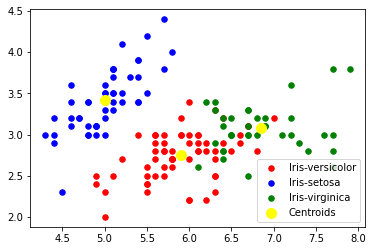

In [97]:

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'red', label = 'Iris-versicolor')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
                s = 100, c = 'yellow', label = 'Centroids')

plt.legend()